# The analysis of income in San Francisco 

## -For The San Francisco Chronicle Newspaper

## --Analyzed by Marco Lin 

## 2019/01/31


### The report is to analyze the cost of living in San Francisco for the San Francisco Chronicle newspaper. There are two main factors affect the cost of living: income and housing. As we know, the cost of living in San Francisco is high which is compared with other cities in the United States. As requested, We will analyze the data focusing on income in different aspects to show the different aspect of truth. It may help people to understand more about the structure of income, and give the advice to make a career decision. 


### The data we use is from Kaggle.com and the time is from 2013 to 2017. In our data, we have several elements of compensation. Salaries, other salaries, overtime pay, benefits, other benefits, health and Dental insurance, retirement.
### In addition, the data list the different jobs titles and classify the job into different departments and organizations that may help us to understand what the group of Jobs have more high salaries. 

### We also will make numerous ranks with the different part of salaries, such as overtime, insurance, and retirement for people who are looking for a job or who are planning a job career.

### Especially, in this report, we will explore the job which is better. We will compare with the total compensation and overtime to identify the benefits of the job. If the percentage of overtime take up a large part of total compensation, that means the job usually need to work over time. On the other hand, if the percentage of overtime take up a less part of total compensation and the compensation is on the top of the rank of compensation, it means this job is good to recommend. We will find the recommendations of jobs.

### In the final, we will explore the data to help our customer to understand the data and help to make business or policy decisions. 

## 1. Preparations

### - // Read the dataset and import the library "tidyverse" I need. 
### - // Checking the status of data, names of header, and summary the data 

In [1]:
cops <- read.csv("~/Downloads/sf-employee-compensation/employee-compensation.csv")
library(tidyverse)
options(scipen=999)
str(cops)
names(cops)
summary(cops)

─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


'data.frame':	213202 obs. of  22 variables:
 $ Year.Type              : Factor w/ 1 level "Fiscal": 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                   : int  2013 2014 2016 2015 2013 2015 2015 2015 2013 2015 ...
 $ Organization.Group.Code: int  1 2 2 2 2 2 2 1 3 6 ...
 $ Organization.Group     : Factor w/ 7 levels "Community Health",..: 6 7 7 7 7 7 7 6 5 3 ...
 $ Department.Code        : Factor w/ 56 levels "AAM","ADM","ADP",..: 29 38 4 38 22 38 38 19 23 46 ...
 $ Department             : Factor w/ 56 levels "AAM Asian Art Museum",..: 28 40 4 40 22 40 40 18 35 47 ...
 $ Union.Code             : int  798 261 790 253 21 21 790 790 535 790 ...
 $ Union                  : Factor w/ 78 levels "","Automotive Machinists, Local 1414",..: 20 27 64 76 57 57 64 64 63 64 ...
 $ Job.Family.Code        : Factor w/ 64 levels "","0900","1000",..: 56 43 7 49 31 31 12 44 21 7 ...
 $ Job.Family             : Factor w/ 58 levels "","Administrative & Mgmt (Unrep)",..: 19 51 10 55 41 41 48 27 23 10 ...
 $ Jo

[1] "Year.Type"               "Year"                   
 [3] "Organization.Group.Code" "Organization.Group"     
 [5] "Department.Code"         "Department"             
 [7] "Union.Code"              "Union"                  
 [9] "Job.Family.Code"         "Job.Family"             
[11] "Job.Code"                "Job"                    
[13] "Employee.Identifier"     "Salaries"               
[15] "Overtime"                "Other.Salaries"         
[17] "Total.Salary"            "Retirement"             
[19] "Health.Dental"           "Other.Benefits"         
[21] "Total.Benefits"          "Total.Compensation"

  Year.Type           Year      Organization.Group.Code
 Fiscal:213202   Min.   :2013   Min.   :1.000          
                 1st Qu.:2014   1st Qu.:2.000          
                 Median :2015   Median :2.000          
                 Mean   :2015   Mean   :2.982          
                 3rd Qu.:2016   3rd Qu.:4.000          
                 Max.   :2017   Max.   :7.000          
                                                       
                                Organization.Group Department.Code
 Community Health                        :46121    DPH    :46121  
 Culture & Recreation                    :19738    MTA    :31059  
 General Administration & Finance        :19440    DSS    :17355  
 General City Responsibilities           :  266    POL    :16972  
 Human Welfare & Neighborhood Development:19594    REC    :12385  
 Public Protection                       :40754    AIR    : 9963  
 Public Works, Transportation & Commerce :67289    (Other):79347  
                

In [2]:
levels(cops$Organization.Group)
cops$Organization.Group.Code <- factor(cops$Organization.Group.Code)

[1] "Community Health"                        
[2] "Culture & Recreation"                    
[3] "General Administration & Finance"        
[4] "General City Responsibilities"           
[5] "Human Welfare & Neighborhood Development"
[6] "Public Protection"                       
[7] "Public Works, Transportation & Commerce"

# 2. Compensation percentage 

### - // We compare with two different time of period of compensation. First one is average of all data. Second one uses the data in 2017. The result shows that the component of compensation is the same from 2013~2017. It have not changed by the time.

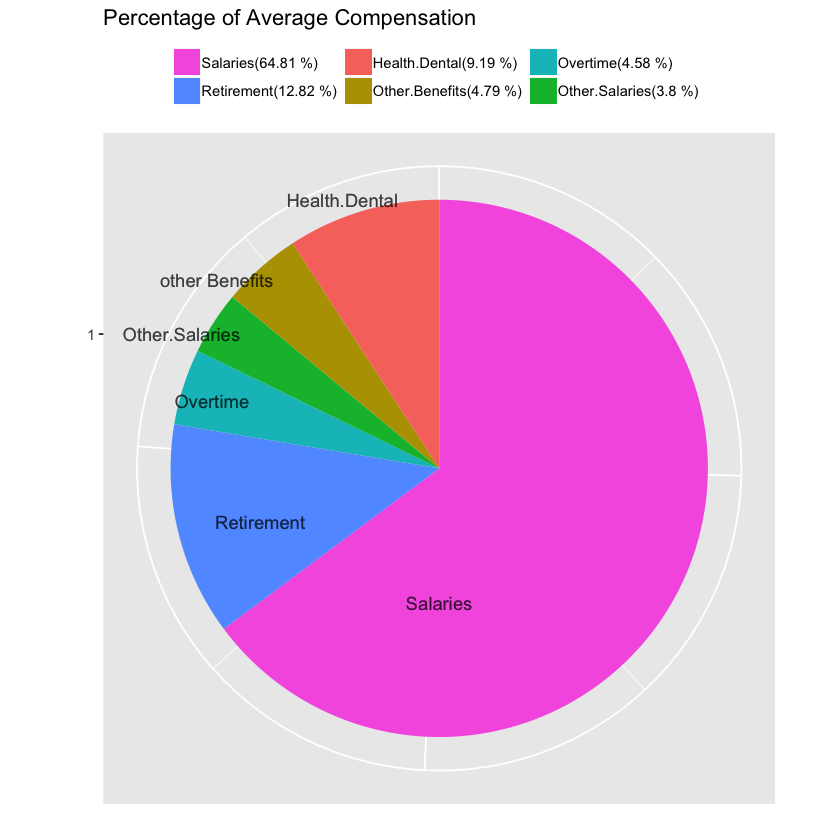

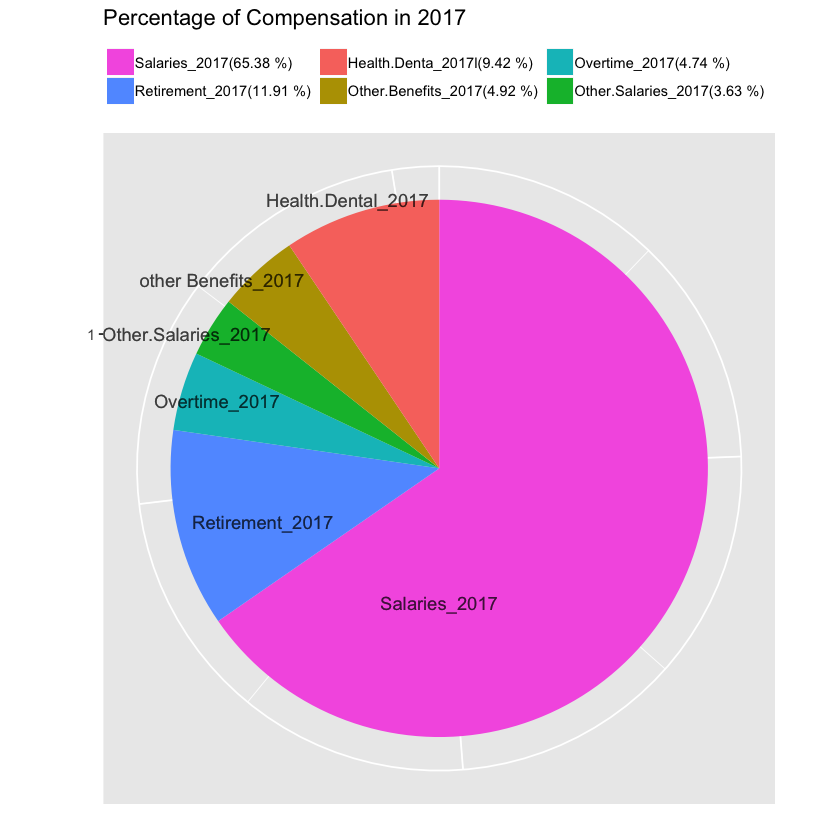

In [3]:
library(ggplot2)

ave_TC <- mean(cops$Total.Compensation)
ave_S <- mean(cops$Salaries)
ave_O <- mean(cops$Overtime)
ave_OS <- mean(cops$Other.Salaries)
ave_R <- mean(cops$Retirement)
ave_HD <- mean(cops$Health.Dental)
ave_OB <- mean(cops$Other.Benefits)

ave_pie <- data.frame(ave_TC = c("Salaries", "Overtime", "Other.Salaries", 
                                 "Retirement", "Health.Dental","Other.Benefits"),
                      perc=c(ave_S,ave_O,ave_OS,ave_R,ave_HD,ave_OB))
                 ave_pie = ave_pie[order(ave_pie$perc, decreasing = TRUE),]
                     myLabel = as.vector(ave_pie$ave_TC)  
                    myLabel = paste(myLabel, "(", round(ave_pie$perc / sum(ave_pie$perc) * 100, 2), " %) ", sep = "")  
                      
                 
ggplot((data=ave_pie),aes(x=factor(1), y=perc, fill=ave_TC)) +
    geom_bar(stat = "identity", width = 1 ) +
    coord_polar("y") +
    labs(x = "", y = "", title = "Percentage of Average Compensation") +
    theme(legend.title = element_blank(), legend.position = "top")+
    theme(axis.text.x = element_blank())  +
    scale_fill_discrete(breaks = ave_pie$ave_TC, labels = myLabel)+
    geom_text(x = 0, y = 0, label = "Salaries", alpha = 0.2)+
    geom_text(x = 0.3, y = 5, label = "Retirement                                                                      ", alpha = 0.2)+
    geom_text(x = 0.75, y = 40, label = "Overtime                                                                                         ", alpha = 0.2)+
    geom_text(x = 1, y = 50, label = "Other.Salaries                                                                                                     ", alpha = 0.2)+
    geom_text(x = 1.2, y =0, label = "other Benefits                                                                                       ", alpha = 0.2)+
    geom_text(x = 1.5, y = 20, label = "Health.Dental                                      ", alpha = 0.2)
 

cops2017 <- cops %>% filter(Year == "2017")
ave_TC_2017 <- mean(cops2017$Total.Compensation)
ave_S_2017 <- mean(cops2017$Salaries)
ave_O_2017 <- mean(cops2017$Overtime)
ave_OS_2017 <- mean(cops2017$Other.Salaries)
ave_R_2017 <- mean(cops2017$Retirement)
ave_HD_2017 <- mean(cops2017$Health.Dental)
ave_OB_2017 <- mean(cops2017$Other.Benefits)

ave_pie_2017 <- data.frame(ave_TC_2017 = c("Salaries_2017", "Overtime_2017", "Other.Salaries_2017", 
                                 "Retirement_2017", "Health.Denta_2017l","Other.Benefits_2017"),
                      perc_2017 =c(ave_S_2017,ave_O_2017,ave_OS_2017,ave_R_2017,ave_HD_2017,ave_OB_2017))
                 ave_pie_2017 = ave_pie_2017[order(ave_pie_2017$perc_2017, decreasing = TRUE),] 
                     myLabel = as.vector(ave_pie_2017$ave_TC_2017) 
                    myLabel = paste(myLabel, "(", round(ave_pie_2017$perc_2017 / sum(ave_pie_2017$perc_2017) * 100, 2), " %) ", sep = "")  
                      
                 
ggplot((data=ave_pie_2017),aes(x=factor(1), y=perc_2017, fill=ave_TC_2017)) +
    geom_bar(stat = "identity", width = 1 ) +
    coord_polar("y") +
    labs(x = "", y = "", title = "Percentage of Compensation in 2017") +
    theme(legend.title = element_blank(), legend.position = "top")+
    theme(axis.text.x = element_blank())  +
    scale_fill_discrete(breaks = ave_pie_2017$ave_TC_2017, labels = myLabel)+
    geom_text(x = 0, y = 0, label = "Salaries_2017", alpha = 0.2)+
    geom_text(x = 0.3, y = 5, label = "Retirement_2017                                                                     ", alpha = 0.2)+
    geom_text(x = 0.75, y = 40, label = "Overtime_2017                                                                                       ", alpha = 0.2)+
    geom_text(x = 1, y = 50, label = "Other.Salaries_2017                                                                                                   ", alpha = 0.2)+
    geom_text(x = 1.2, y =0, label = "other Benefits_2017                                                                                     ", alpha = 0.2)+
    geom_text(x = 1.5, y = 20, label = "Health.Dental_2017                                    ", alpha = 0.2)

# The tendency of Total Compensation

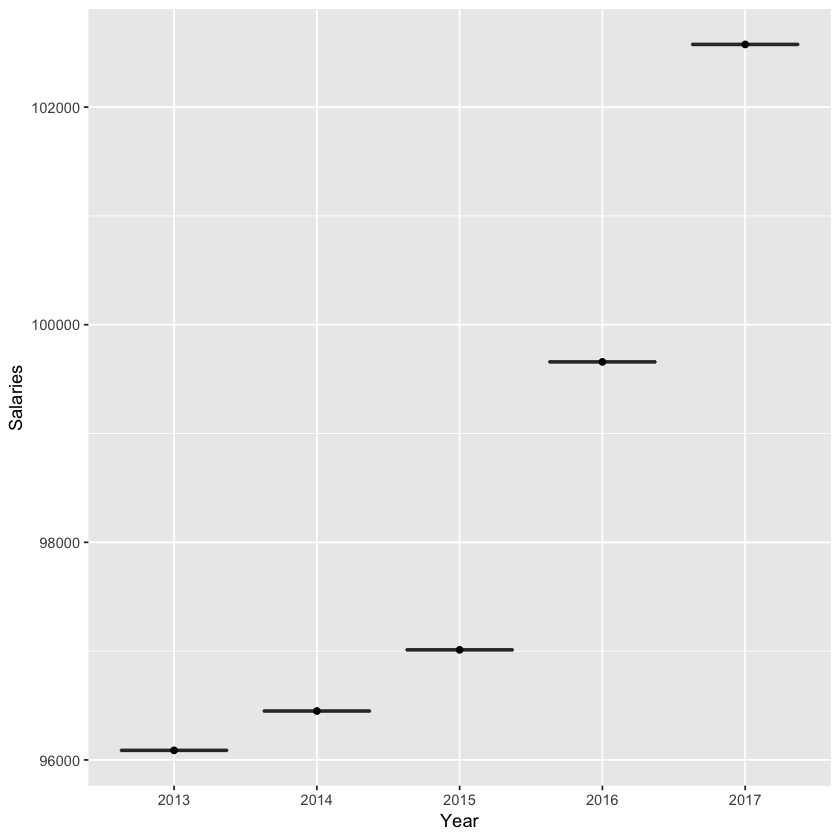

In [4]:
cou2017 <- cops %>% filter(Year =="2017")
cou2016 <- cops %>% filter(Year =="2016")
cou2015 <- cops %>% filter(Year =="2015")
cou2014 <- cops %>% filter(Year =="2014")
cou2013 <- cops %>% filter(Year =="2013")

couData<-data_frame(Year=c("2017","2016","2015","2014","2013"),
                 Salaries=c(mean(cou2017$Total.Compensation),
                            mean(cou2016$Total.Compensation),
                            mean(cou2015$Total.Compensation),
                            mean(cou2014$Total.Compensation),
                            mean(cou2013$Total.Compensation)))

qplot(Year,Salaries, data = couData,
geom = c('boxplot', "point"))


### - This chart shows that our compensation from 2013 to 2017 is increasing

# 3. a. Compare the total compensation from 2013 to 2017

### - We rank the total compensation and salaries in each year. In each cell, top is ranked by total compensation, and the bottom is ranked by salaries.

## "2013" 1. Rank order by total compensation 2. Rank order by Salaries

In [5]:
Tcops_2013 <- cops %>% filter(Year == "2013")
    Tcops_2013s <- select (Tcops_2013, Organization.Group,Job,Total.Compensation, Salaries)
        head(Tcops_2013s[order(Tcops_2013s$Total.Compensation, decreasing = T),], n=10)
        head(Tcops_2013s[order(Tcops_2013s$Salaries, decreasing = T),], n=10)

,Organization.Group,Job,Total.Compensation,Salaries
26100,Public Protection,"Battlion Chief, Fire Suppressi",425631.5,147998.7
22455,Public Protection,Chief Of Police,397266.2,305942.0
19361,Public Protection,"Chief, Fire Department",396756.2,302068.0
4871,Public Protection,"Battlion Chief, Fire Suppressi",389304.6,174681.3
23250,Public Protection,"Battlion Chief, Fire Suppressi",385316.2,179760.5
15831,"Public Works, Transportation & Commerce",Executive Contract Employee,382392.9,286156.5
36583,"Public Works, Transportation & Commerce",Dept Head V,382060.8,302114.2
30078,General Administration & Finance,Dept Head V,381144.2,279879.2
4799,Public Protection,"Battlion Chief, Fire Suppressi",381072.5,178067.4
14351,Public Protection,"Lieutenant, Fire Suppression",376970.6,131177.3


,Organization.Group,Job,Total.Compensation,Salaries
22455,Public Protection,Chief Of Police,397266.2,305942.0
36583,"Public Works, Transportation & Commerce",Dept Head V,382060.8,302114.2
19361,Public Protection,"Chief, Fire Department",396756.2,302068.0
20966,"Public Works, Transportation & Commerce","Gen Mgr, Public Trnsp Dept",369054.7,294000.2
15831,"Public Works, Transportation & Commerce",Executive Contract Employee,382392.9,286156.5
30078,General Administration & Finance,Dept Head V,381144.2,279879.2
5366,General Administration & Finance,"Dep Dir For Investments, Ret",347307.2,273446.0
5792,General Administration & Finance,Mayor,346334.6,272103.0
2527,Community Health,"Adm, SFGH Medical Center",342746.8,270058.0
22393,Public Protection,Deputy Chief 3,342242.2,268632.0


## "2014" 1. Rank order by total compensation 2. Rank order by Salaries

In [6]:
Tcops_2014 <- cops %>% filter(Year == "2014")
    Tcops_2014s <- select (Tcops_2014, Organization.Group,Job,Total.Compensation, Salaries)
        head(Tcops_2014s[order(Tcops_2014s$Total.Compensation, decreasing = T),] ,n=10)
                head(Tcops_2014s[order(Tcops_2014s$Salaries, decreasing = T),], n=10)

,Organization.Group,Job,Total.Compensation,Salaries
29708,General Administration & Finance,Asst Med Examiner,433100.1,267141.0
19354,Public Protection,Deputy Chief 3,425320.2,191142.0
34221,Public Protection,"Chief, Fire Department",416870.0,303229.8
7932,Public Protection,Chief Of Police,413233.7,308632.5
6693,"Public Works, Transportation & Commerce",Executive Contract Employee,403817.5,306710.7
27450,"Public Works, Transportation & Commerce",Dept Head V,402431.1,307760.6
14137,Public Protection,"Battlion Chief, Fire Suppressi",392246.9,179464.1
10727,Public Protection,Deputy Chief 3,390027.5,160146.0
28205,Public Protection,Asst Chf Of Dept (Fire Dept),389757.4,205480.8
24652,Community Health,Senior Physician Specialist,387258.3,199638.9


,Organization.Group,Job,Total.Compensation,Salaries
7932,Public Protection,Chief Of Police,413233.7,308632.5
27450,"Public Works, Transportation & Commerce",Dept Head V,402431.1,307760.6
6693,"Public Works, Transportation & Commerce",Executive Contract Employee,403817.5,306710.7
34221,Public Protection,"Chief, Fire Department",416870.0,303229.8
5891,"Public Works, Transportation & Commerce","Gen Mgr, Public Trnsp Dept",386174.8,295131.0
10665,General Administration & Finance,Mayor,367052.3,279158.5
36930,Community Health,"Adm, SFGH Medical Center",356942.9,271007.3
12094,Community Health,Dept Head V,356391.8,267936.7
29587,Human Welfare & Neighborhood Development,Dept Head V,356015.9,267936.6
6211,General Administration & Finance,Dept Head V,353671.7,267936.6


## "2015" 1. Rank order by total compensation 2. Rank order by Salaries

In [7]:
Tcops_2015 <- cops %>% filter(Year == "2015")
    Tcops_2015s <- select (Tcops_2015, Organization.Group,Job,Total.Compensation, Salaries)
        head(Tcops_2015s[order(Tcops_2015s$Total.Compensation, decreasing = T),] ,n=10)
        head(Tcops_2015s[order(Tcops_2015s$Salaries, decreasing = T),], n=10)

,Organization.Group,Job,Total.Compensation,Salaries
12573,General Administration & Finance,Asst Med Examiner,497505.9,276342.3
3312,General Administration & Finance,Chief Investment Officer,495721.5,379201.7
40089,General Administration & Finance,Asst Med Examiner,460272.2,276342.3
28311,Public Protection,Deputy Chief 3,438159.4,221104.8
5551,Public Protection,"Chief, Fire Department",424563.3,303229.8
12781,"Public Works, Transportation & Commerce",Dept Head V,422449.0,318344.8
30602,Public Protection,Chief Of Police,420516.1,308632.6
31306,"Public Works, Transportation & Commerce",Executive Contract Employee,419936.2,317112.8
10897,"Public Works, Transportation & Commerce",Executive Contract Employee,409466.3,198862.0
21276,General Administration & Finance,Asst Med Examiner,407999.8,238677.5


,Organization.Group,Job,Total.Compensation,Salaries
3312,General Administration & Finance,Chief Investment Officer,495721.5,379201.7
12781,"Public Works, Transportation & Commerce",Dept Head V,422449.0,318344.8
31306,"Public Works, Transportation & Commerce",Executive Contract Employee,419936.2,317112.8
30602,Public Protection,Chief Of Police,420516.1,308632.6
5551,Public Protection,"Chief, Fire Department",424563.3,303229.8
23843,Community Health,Dept Head V,401962.9,302512.9
37622,"Public Works, Transportation & Commerce","Gen Mgr, Public Trnsp Dept",401619.5,299066.0
2032,Community Health,"Administrator, Department Of Public Heal",385268.0,289017.1
8038,General Administration & Finance,Mayor,382096.3,286416.4
12573,General Administration & Finance,Asst Med Examiner,497505.9,276342.3


## "2016" 1. Rank order by total compensation 2. Rank order by Salaries

In [8]:
Tcops_2016 <- cops %>% filter(Year == "2016")
    Tcops_2016s <- select (Tcops_2016, Organization.Group,Job,Total.Compensation, Salaries)
        head(Tcops_2016s[order(Tcops_2016s$Total.Compensation, decreasing = T),] ,n=10)
        head(Tcops_2016s[order(Tcops_2016s$Salaries, decreasing = T),], n=10)

,Organization.Group,Job,Total.Compensation,Salaries
6979,General Administration & Finance,Chief Investment Officer,653605.3,515101.8
35096,Public Protection,Chief Of Police,466893.1,292450.1
38034,General Administration & Finance,Dept Head V,433409.9,329237.3
15032,"Public Works, Transportation & Commerce",Dept Head V,430979.8,334779.1
34738,Public Protection,"Chief, Fire Department",426114.0,307430.8
3032,"Public Works, Transportation & Commerce",Executive Contract Employee,422127.0,328434.4
6173,Community Health,Senior Physician Specialist,418120.8,233936.4
26296,"Public Works, Transportation & Commerce","Gen Mgr, Public Trnsp Dept",410566.7,312303.7
25348,Community Health,Dept Head V,408264.6,316368.5
3464,Public Protection,Deputy Sheriff,402311.7,100724.1


,Organization.Group,Job,Total.Compensation,Salaries
6979,General Administration & Finance,Chief Investment Officer,653605.3,515101.8
15032,"Public Works, Transportation & Commerce",Dept Head V,430979.8,334779.1
38034,General Administration & Finance,Dept Head V,433409.9,329237.3
3032,"Public Works, Transportation & Commerce",Executive Contract Employee,422127.0,328434.4
25348,Community Health,Dept Head V,408264.6,316368.5
26296,"Public Works, Transportation & Commerce","Gen Mgr, Public Trnsp Dept",410566.7,312303.7
34738,Public Protection,"Chief, Fire Department",426114.0,307430.8
39638,Community Health,"Administrator, Department Of Public Heal",395733.6,306398.6
40077,General Administration & Finance,Mayor,382731.8,295276.9
35096,Public Protection,Chief Of Police,466893.1,292450.1


## "2017" 1. Rank order by total compensation 2. Rank order by Salaries

In [9]:
Tcops_2017 <- cops %>% filter(Year == "2017")
    Tcops_2017s <- select (Tcops_2017, Organization.Group,Job,Total.Compensation, Salaries)
        head(Tcops_2017s[order(Tcops_2017s$Total.Compensation, decreasing = T),] ,n=10)
        head(Tcops_2017s[order(Tcops_2017s$Salaries, decreasing = T),], n=10)

,Organization.Group,Job,Total.Compensation,Salaries
16694,General Administration & Finance,Chief Investment Officer,668412.4,533985.9
40344,Community Health,"Physician Administrator, DPH",538791.7,418016.6
33877,General Administration & Finance,Managing Director,532690.6,420076.6
9459,"Public Works, Transportation & Commerce",Transit Operator,479167.2,355340.6
10158,General Administration & Finance,Dept Head V,452385.2,346944.0
39784,Public Protection,"Chief, Fire Department",443297.1,312390.9
36917,Community Health,Senior Physician Specialist,436540.5,243095.4
29056,"Public Works, Transportation & Commerce",Executive Contract Employee,436449.8,340344.0
26522,General Administration & Finance,Managing Director,427395.4,320644.3
38258,Public Protection,Sheriff's Lieutenant,427324.1,138857.5


,Organization.Group,Job,Total.Compensation,Salaries
16694,General Administration & Finance,Chief Investment Officer,668412.4,533985.9
33877,General Administration & Finance,Managing Director,532690.6,420076.6
40344,Community Health,"Physician Administrator, DPH",538791.7,418016.6
9459,"Public Works, Transportation & Commerce",Transit Operator,479167.2,355340.6
10158,General Administration & Finance,Dept Head V,452385.2,346944.0
29056,"Public Works, Transportation & Commerce",Executive Contract Employee,436449.8,340344.0
5744,Community Health,Dept Head V,424592.3,329470.3
35149,"Public Works, Transportation & Commerce","Gen Mgr, Public Trnsp Dept",425119.9,324064.9
26522,General Administration & Finance,Managing Director,427395.4,320644.3
15127,Community Health,"Administrator, Department Of Public Heal",408262.4,316781.3


### ---- In this object, the jobs of Public Protection were the highest salaries in 2013. Then, after 2014, the jobs of General Administration & Finance has started to replace the jobs of Public Protection, becoming the highest job in general. In 2017, the salaries of jobs of Public Protection is decreasing. So, in this result, we know the good job in 2017 is in General Administration & Finance field.

# *Vector

In [10]:
JobTitle <- c("Chief Investment Officer","Physician Administrator, DPH", "Managing Director","Transit Operator","Dept Head V" )
JobTitle

[1] "Chief Investment Officer"     "Physician Administrator, DPH"
[3] "Managing Director"            "Transit Operator"            
[5] "Dept Head V"

### -This vector I set is for the top five of high salaries in 2017. It is easy for people understand the what the popular job now.

# !Compare "the Chief Of Police" and "the Chief Investment Officer"!

In [11]:
counts2017 <- cops %>% filter(Organization.Group == "Public Protection", Year =="2017", 
                              Job =="Chief Of Police", Employee.Identifier == "55717")
counts2016 <- cops %>% filter(Organization.Group == "Public Protection", Year =="2016", 
                              Job =="Chief Of Police", Employee.Identifier == "55717")
counts2015 <- cops %>% filter(Organization.Group == "Public Protection", Year =="2015", 
                              Job =="Chief Of Police",Employee.Identifier == "55717")
counts2014 <- cops %>% filter(Organization.Group == "Public Protection", Year =="2014", 
                              Job =="Chief Of Police",Employee.Identifier == "55717")
counts2013 <- cops %>% filter(Organization.Group == "Public Protection", Year =="2013", 
                              Job =="Chief Of Police",Employee.Identifier == "55717")
listSample<-data_frame(Year=c("2017","2016","2015","2014","2013"),
                 Salaries=c(mean(counts2017$Total.Compensation),
                            mean(counts2016$Total.Compensation),
                            mean(counts2015$Total.Compensation),
                            mean(counts2014$Total.Compensation),
                            mean(counts2017$Total.Compensation)))

p1 <- ggplot(listSample, aes(x = Year , y = Salaries)) + geom_bar(stat = "identity") + ggtitle("Chief Of Police") 

Warning message:
“Removed 1 rows containing missing values (position_stack).”

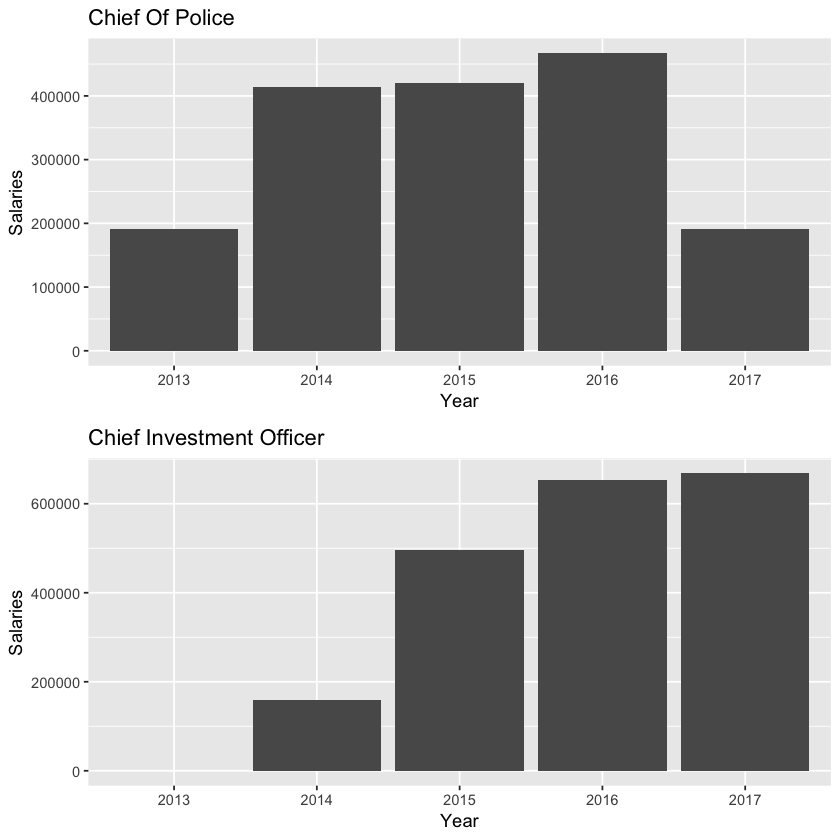

In [12]:
Gcounts2017 <- cops %>% filter(Organization.Group == "General Administration & Finance", Year =="2017", Job =="Chief Investment Officer", Employee.Identifier =="33145")
Gcounts2016 <- cops %>% filter(Organization.Group == "General Administration & Finance", Year =="2016", Job =="Chief Investment Officer", Employee.Identifier =="33145")
Gcounts2015 <- cops %>% filter(Organization.Group == "General Administration & Finance", Year =="2015", Job =="Chief Investment Officer", Employee.Identifier =="33145")
Gcounts2014 <- cops %>% filter(Organization.Group == "General Administration & Finance", Year =="2014", Job =="Chief Investment Officer", Employee.Identifier =="33145")
Gcounts2013 <- cops %>% filter(Organization.Group == "General Administration & Finance", Year =="2013", Job =="Chief Investment Officer", Employee.Identifier =="33145")

GlistSample<-data_frame(Year=c("2017","2016","2015","2014","2013"),
                 Salaries=c(mean(Gcounts2017$Total.Compensation),
                            mean(Gcounts2016$Total.Compensation),
                            mean(Gcounts2015$Total.Compensation),
                            mean(Gcounts2014$Total.Compensation),
                            mean(Gcounts2013$Total.Compensation)))

p2 <- ggplot(GlistSample, aes( x = Year, y = Salaries)) + geom_bar(stat = "identity") + ggtitle("Chief Investment Officer") 


cowplot::plot_grid(p1,p2, ncol = 1, 
align = 'h', axis = 'l')


### - in this bar chart, we can see from 2014, the compensation of Chief investment Officer has been increasing. On the other hand, the compensation of the Chief of Police had increased from 2014 to 2016, but it have decreased in 2017. That why Chief investment Officer are on the top one of salaries now.

# 4. Jobs Advantage Difference

## a. Retirement Rank

### -// Use select function to pick up Organization.Group,Job, and Total.Compensation with different condition. and show the top 10.

In [13]:
Tcops_2017R <- select (Tcops_2017, Organization.Group,Job, Retirement ,Total.Compensation)
        head(Tcops_2017R[order(Tcops_2017R$Retirement, decreasing = T),], n=10)

,Organization.Group,Job,Retirement,Total.Compensation
16694,General Administration & Finance,Chief Investment Officer,95600.00,668412.4
9459,"Public Works, Transportation & Commerce",Transit Operator,93356.58,479167.2
33877,General Administration & Finance,Managing Director,75146.60,532690.6
40344,Community Health,"Physician Administrator, DPH",74197.99,538791.7
10158,General Administration & Finance,Dept Head V,61582.56,452385.2
29056,"Public Works, Transportation & Commerce",Executive Contract Employee,60411.06,436449.8
39784,Public Protection,"Chief, Fire Department",59310.43,443297.1
5744,Community Health,Dept Head V,58480.96,424592.3
35149,"Public Works, Transportation & Commerce","Gen Mgr, Public Trnsp Dept",57521.53,425119.9
26522,General Administration & Finance,Managing Director,57119.52,427395.4


# b. Health/Dental Rank

In [14]:
Tcops_2017H <- select (Tcops_2017,Organization.Group, Job, Health.Dental ,Total.Compensation)
        head(Tcops_2017H[order(Tcops_2017H$Health.Dental, decreasing = T),] , n=10)

,Organization.Group,Job,Health.Dental,Total.Compensation
18472,Public Protection,Duty Officer,22270.12,165057.7
23851,Public Protection,EMT/Paramedic/Firefighter,19304.20,247032.4
40888,Public Protection,Senior Deputy Sheriff,18658.44,266037.3
26742,Public Protection,Firefighter,18153.37,195839.9
289,Public Protection,Firefighter,16930.04,190150.3
534,Public Protection,Firefighter,16930.04,178417.4
2232,Public Protection,Firefighter,16930.04,225436.3
2256,Public Protection,Firefighter,16930.04,130454.0
3182,Public Protection,Firefighter,16930.04,235636.4
3510,Public Protection,EMT/Paramedic/Firefighter,16930.04,215996.7


### - Public Protection Job get a lot of pay from Health and Dental. in addition, by connecting with the data below, the Public Protection Job is not a good choice for the person who just want to have a easy job.

# c. Overtime Rank

In [15]:
Tcops_2017O <- select (Tcops_2017, Organization.Group,Job, Overtime ,Total.Compensation)
        head(Tcops_2017O[order(Tcops_2017O$Overtime, decreasing = T),] , n=10)

,Organization.Group,Job,Overtime,Total.Compensation
42289,Public Protection,Deputy Sheriff,203449.6,393669.9
37897,Public Protection,Deputy Sheriff,200886.2,386896.9
32522,Public Protection,Deputy Sheriff,192194.7,373945.3
40160,Public Protection,Senior Deputy Sheriff,189972.2,390984.1
38258,Public Protection,Sheriff's Lieutenant,188937.8,427324.1
30262,Public Protection,Deputy Sheriff,184093.9,368179.8
13453,Public Protection,Senior Deputy Sheriff,177436.7,371386.2
23970,Public Protection,Deputy Sheriff,170196.5,349619.6
34724,Public Protection,Deputy Sheriff,163724.4,346018.1
34927,Public Protection,Senior Deputy Sheriff,160622.8,345817.9


### - Obviously in this rank, Public Protection is the hardest work in 2017 because the salary of this kind of job is not high and employee still need to work overtime to protect the society.

# d. Salaries Rank

In [16]:
Tcops_2017S <- select (Tcops_2017, Organization.Group,Job, Salaries ,Total.Compensation)
        head(Tcops_2017S[order(Tcops_2017S$Salaries, decreasing = T),] , n=10)

,Organization.Group,Job,Salaries,Total.Compensation
16694,General Administration & Finance,Chief Investment Officer,533985.9,668412.4
33877,General Administration & Finance,Managing Director,420076.6,532690.6
40344,Community Health,"Physician Administrator, DPH",418016.6,538791.7
9459,"Public Works, Transportation & Commerce",Transit Operator,355340.6,479167.2
10158,General Administration & Finance,Dept Head V,346944.0,452385.2
29056,"Public Works, Transportation & Commerce",Executive Contract Employee,340344.0,436449.8
5744,Community Health,Dept Head V,329470.3,424592.3
35149,"Public Works, Transportation & Commerce","Gen Mgr, Public Trnsp Dept",324064.9,425119.9
26522,General Administration & Finance,Managing Director,320644.3,427395.4
15127,Community Health,"Administrator, Department Of Public Heal",316781.3,408262.4


### - The job Chief Investment Officer and Managing Director both from the General Administration & Finance  have a good salaries in 2017. We can say if people want to find a job with a good salary, we will recommand the job from General Administration & Finance.

# e. None overtime Job Rank in 2017

In [17]:
NOvertime_2017 <- cops %>% filter(Year == "2017", Overtime == "0")
Novertime_2017 <- select (NOvertime_2017, Organization.Group,Job, Salaries ,Total.Compensation)
        head(Tcops_2017S[order(Tcops_2017S$Total.Compensation, decreasing = T),] , n=25)

,Organization.Group,Job,Salaries,Total.Compensation
16694,General Administration & Finance,Chief Investment Officer,533985.9,668412.4
40344,Community Health,"Physician Administrator, DPH",418016.6,538791.7
33877,General Administration & Finance,Managing Director,420076.6,532690.6
9459,"Public Works, Transportation & Commerce",Transit Operator,355340.6,479167.2
10158,General Administration & Finance,Dept Head V,346944.0,452385.2
39784,Public Protection,"Chief, Fire Department",312390.9,443297.1
36917,Community Health,Senior Physician Specialist,243095.4,436540.5
29056,"Public Works, Transportation & Commerce",Executive Contract Employee,340344.0,436449.8
26522,General Administration & Finance,Managing Director,320644.3,427395.4
38258,Public Protection,Sheriff's Lieutenant,138857.5,427324.1


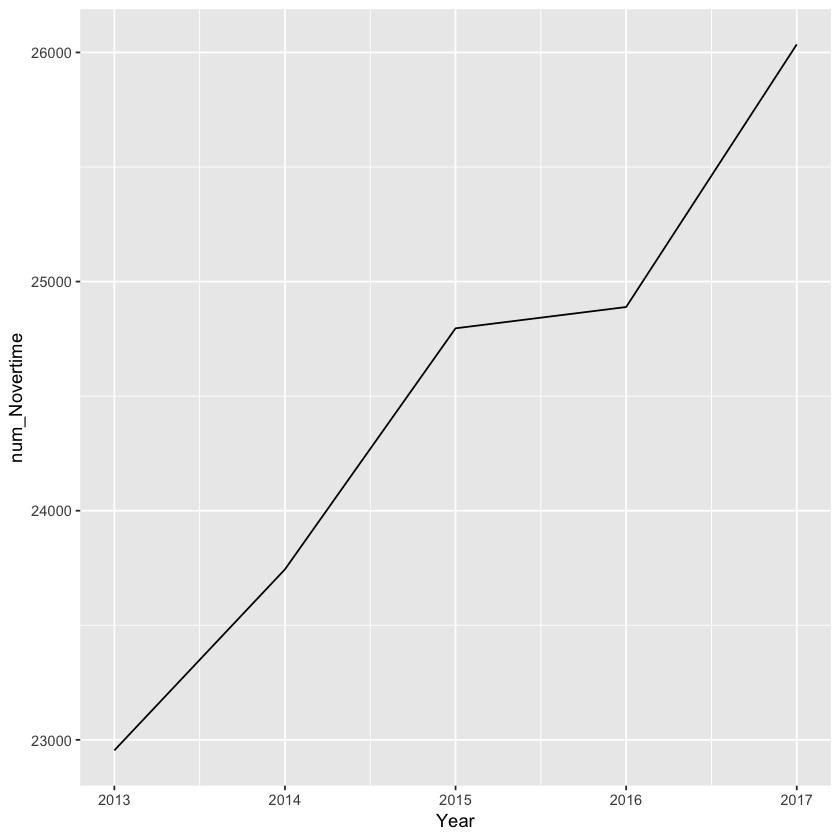

In [18]:
CNOvertime <- cops %>% filter(Overtime == "0") %>% group_by (Year) %>% summarize (num_Novertime = n())
qplot(Year, num_Novertime, data = CNOvertime,
     geom = c("line"))

### - None overtime rank shows that in some position, employee barely have to work overtime, and also we get the rank that allow us to know which job without overtime still has a good Salaries. It may guide people to consider.
### In addition, in the line chart, we can see there is more none-overtime job than the past. It seems government is improving the situation of overtime. People also have more consideration of none- overtime job. 

# 5. Compare Public Protection and General Administration & Finance

## a. Public Protection Pie Chart

### - // Using filter function to get the data in 2017 and get the jobs in Organization Group. Using mean function to get the average of each column, and make a data frame called P_ave_pie. By using ggplot function to draw the pie chart.

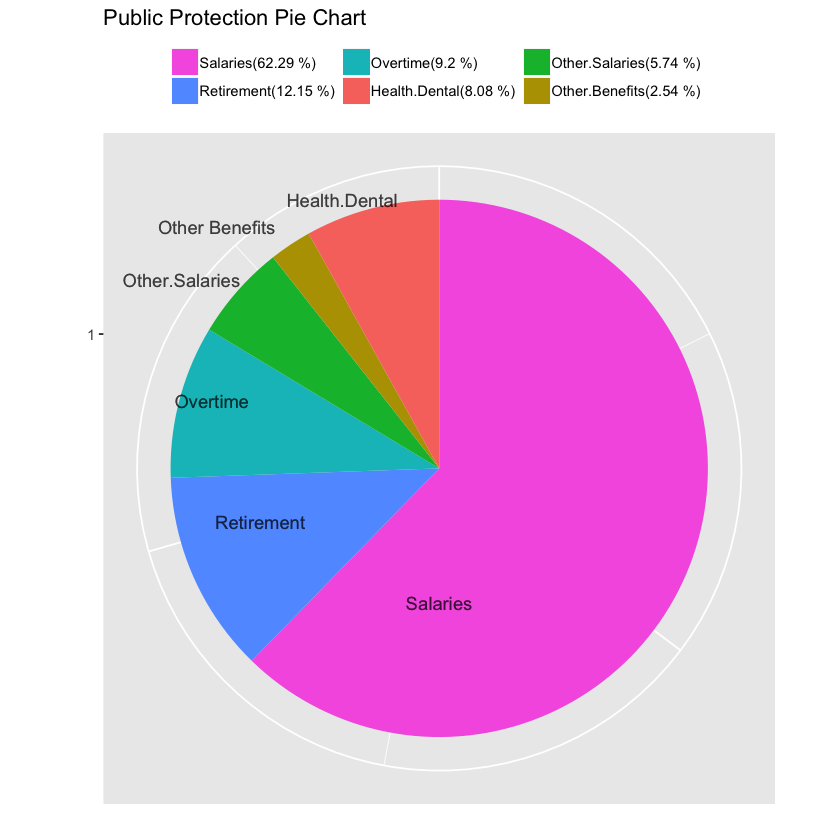

In [19]:
PublicProtect <- cops %>% filter(Year == "2017" , Organization.Group =="Public Protection" )

P_ave_TC <- mean(PublicProtect$Total.Compensation)
P_ave_S <- mean(PublicProtect$Salaries)
P_ave_O <- mean(PublicProtect$Overtime)
P_ave_OS <- mean(PublicProtect$Other.Salaries)
P_ave_R <- mean(PublicProtect$Retirement)
P_ave_HD <- mean(PublicProtect$Health.Dental)
P_ave_OB <- mean(PublicProtect$Other.Benefits)

P_ave_pie <- data.frame(P_ave_TC = c("Salaries", "Overtime", "Other.Salaries", 
                                 "Retirement", "Health.Dental","Other.Benefits"),
                      P_perc=c(P_ave_S,P_ave_O,P_ave_OS,P_ave_R,P_ave_HD,P_ave_OB))
                 P_ave_pie = P_ave_pie[order(P_ave_pie$P_perc, decreasing = TRUE),] 
                     myLabel = as.vector(P_ave_pie$P_ave_TC)   
                    myLabel = paste(myLabel, "(", round(P_ave_pie$P_perc / sum(P_ave_pie$P_perc) * 100, 2), " %) ", sep = "")   
                      
                 
ggplot((data=P_ave_pie),aes(x=factor(1), y=P_perc, fill=P_ave_TC)) +
    geom_bar(stat = "identity", width = 1 ) +
    coord_polar("y") +
    labs(x = "", y = "", title = "Public Protection Pie Chart") +
    theme(legend.title = element_blank(), legend.position = "top")+
    theme(axis.text.x = element_blank())  +
    scale_fill_discrete(breaks = P_ave_pie$P_ave_TC, labels = myLabel)+
    geom_text(x = 0, y = 0, label = "Salaries", alpha = 0.2)+
    geom_text(x = 0.3, y = 5, label = "Retirement                                                                      ", alpha = 0.2)+
    geom_text(x = 0.75, y = 40, label = "Overtime                                                                                         ", alpha = 0.2)+
    geom_text(x = 1.2, y = 50, label = "Other.Salaries                                                                                                     ", alpha = 0.2)+
    geom_text(x = 1.4, y =0, label = "Other Benefits                                                                                       ", alpha = 0.2)+
    geom_text(x = 1.5, y = 20, label = "Health.Dental                                      ", alpha = 0.2)
 



## b.General Administration & Finance Pie Chart

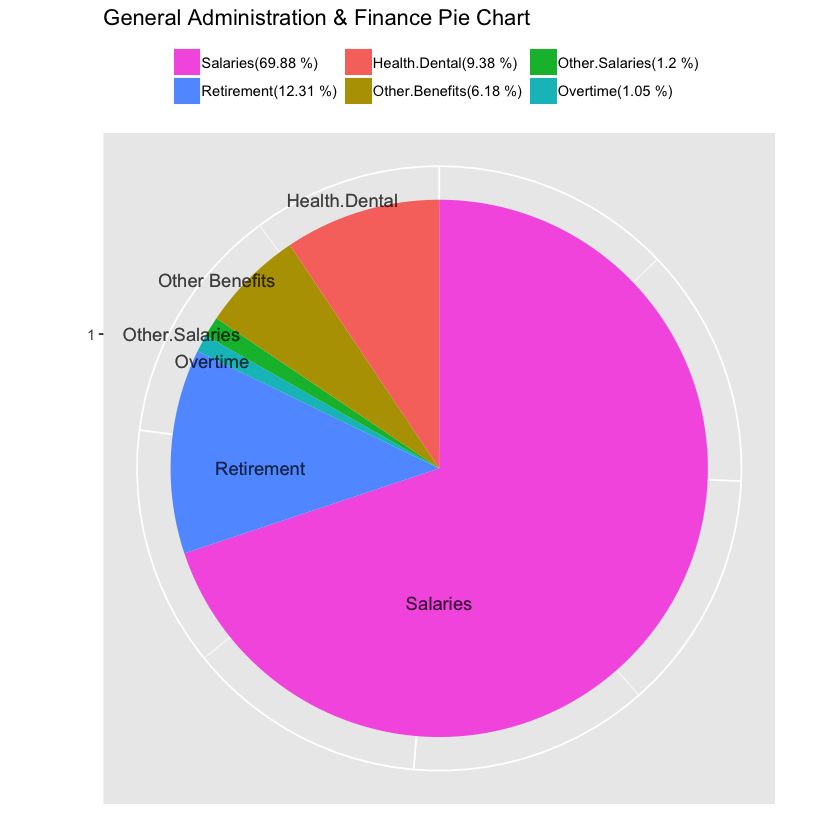

In [20]:
GAF <- cops %>% filter(Year == "2017" , Organization.Group =="General Administration & Finance" )
GAF_ave_TC <- mean(GAF$Total.Compensation)
GAF_ave_S <- mean(GAF$Salaries)
GAF_ave_O <- mean(GAF$Overtime)
GAF_ave_OS <- mean(GAF$Other.Salaries)
GAF_ave_R <- mean(GAF$Retirement)
GAF_ave_HD <- mean(GAF$Health.Dental)
GAF_ave_OB <- mean(GAF$Other.Benefits)

GAF_ave_pie <- data.frame(GAF_ave_TC = c("Salaries", "Overtime", "Other.Salaries", 
                                 "Retirement", "Health.Dental","Other.Benefits"),
                      GAF_perc=c(GAF_ave_S,GAF_ave_O,GAF_ave_OS,GAF_ave_R,GAF_ave_HD,GAF_ave_OB))
                 GAF_ave_pie = GAF_ave_pie[order(GAF_ave_pie$GAF_perc, decreasing = TRUE),] 
                     myLabel = as.vector(GAF_ave_pie$GAF_ave_TC)
                    myLabel = paste(myLabel, "(", round(GAF_ave_pie$GAF_perc / sum(GAF_ave_pie$GAF_perc) * 100, 2), " %) ", sep = "")                       
                 
ggplot((data=GAF_ave_pie),aes(x=factor(1), y=GAF_perc, fill=GAF_ave_TC)) +
    geom_bar(stat = "identity", width = 1 ) +
    coord_polar("y") +
    labs(x = "", y = "", title = "General Administration & Finance Pie Chart") +
    theme(legend.title = element_blank(), legend.position = "top")+
    theme(axis.text.x = element_blank())  +
    scale_fill_discrete(breaks = GAF_ave_pie$GAF_ave_TC, labels = myLabel)+
    geom_text(x = 0, y = 0, label = "Salaries", alpha = 0.2)+
    geom_text(x = 0.5, y = 5, label = "Retirement                                                                      ", alpha = 0.2)+
    geom_text(x = 0.9, y = 40, label = "Overtime                                                                                         ", alpha = 0.2)+
    geom_text(x = 1.0, y = 50, label = "Other.Salaries                                                                                                     ", alpha = 0.2)+
    geom_text(x = 1.2, y =0, label = "Other Benefits                                                                                       ", alpha = 0.2)+
    geom_text(x = 1.5, y = 20, label = "Health.Dental                                      ", alpha = 0.2)
 




### - As this two chart, we know the jobs of Public Protection have around 9.2% overtime and the jobs of General Administration & Finance have only 1.05% overtime. So, it mean Public Protection jobs is more exhausting.

# For Advanced Level

,Year,Job,Retirement
2881,2015,Firefighter,35397.88
2505,2015,Firefighter,32606.06
2169,2015,Firefighter,32534.11
3670,2015,Firefighter,32065.52
2506,2015,Firefighter,31529.17
2381,2015,Firefighter,31402.59
2711,2014,Firefighter,31113.59
272,2014,Firefighter,30883.26
618,2015,Firefighter,30467.33
3802,2015,Firefighter,30312.20


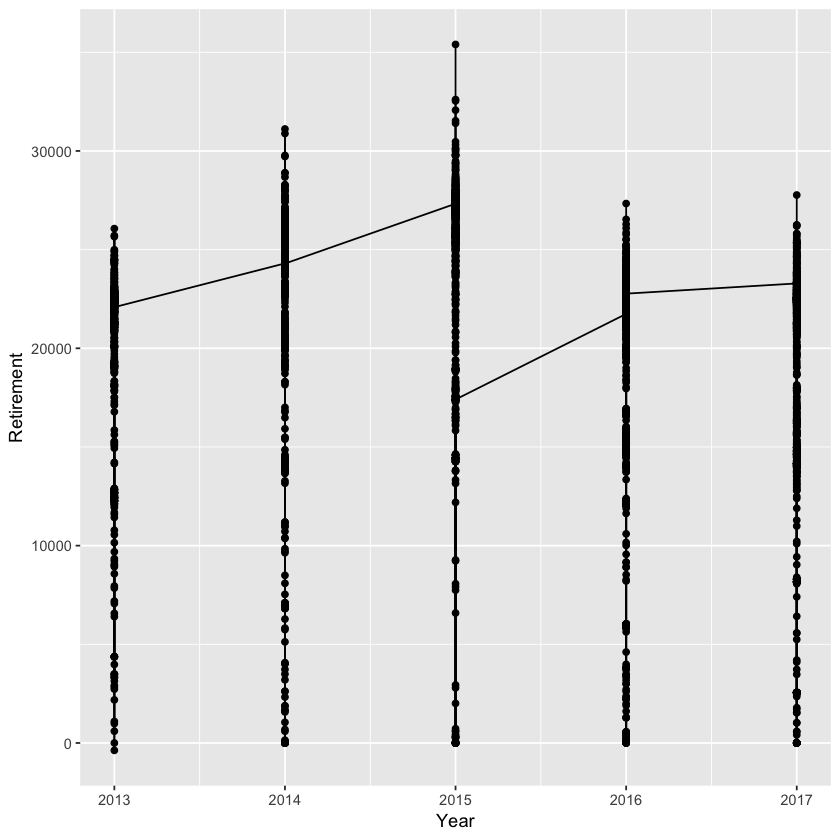

In [21]:
FAL <- cops %>% filter(Job == "Firefighter")

FALS <- select (FAL, Year ,Job, Retirement)

head(FALS[order(FALS$Retirement, decreasing = T),] , n=25)

qplot(Year,Retirement, data = FALS,
geom = c("point", "line"))

### - This chart can provide the tendency of the retirement of compensation of firefighter. we can see in here the retirement compensation is decreasing. In 2017, the number is around 22000, but according the recording, in 2015, it was the highest number of retirement compensation. So, when the CEO is considering about retirement for firefighter, this data will helpful to improve it appropriately.

# -Summary- 

### We analyzed the structure of compensation. The result shows that the percentage of each elements are not too much changed from 2013 to 2017 in general. 
### In pie chart, Salaries takes up the most of part, Retirement is second, and Health/Dental is third. Then, we compare the total compensation change in each job in each year with ranking.
### It shows that the publication protect was the highest, but in 2015 Chief Investment Officer  was becoming higher than the publication protect until 2017. 
### We explored in specific data: Chief Of Police and Chief Investment Officer. The salaries of chief investment officer is higher than chief of police. So, we analyzed the advantage in the different jobs with different conditions. we find the most overtime and health/dental job is belonging to public protection. 
### We also look for none overtime job with good salaries. In final, we show the data that working in General Administration & Finance area is may a good choise.

# -Recommandation-

### This recommandation for San Francisco Chronicle newspaper CEO is to show the fact of job. 
### The jobs in public protection is good for the person who want to help to maintain the security. It will be a pretty great dream job. But, this job's basic salaries is not too hight. They are leaning on overtime pay.  
### for the person who is thinking about overtime, I will recommand the job in General Administration & Finance area. 
### According to the data above, it barely need to work overtime and the salaries is good. we also have a investigation of none overtime job. 
### There may some people want to apply this kind of job. we have top three to recommand: In General Administration & Finance, Chief Investment Officer, In Community Health, Physician Administrator, and also in General Administration & Finance, Managing Director. 
### In this report, there may some data are miss that may cause the average is not accurate, but we still tried our best to show the useful truth to people. 
### So, I will recommand to attract the attention from government to take care of the public protection group. This is because this job salaries is decreaing now. 